# PR 
## 1A: Regresi Linier 

NRP : 2172044     
Nama : Kristiani Nainggolan

Anda akan menggunakan dataset biaya penerbangan. The dataset has the following attributes, among others:
1. _Airline name_
2. _Length of flight_ (miles)
3. _Speed of Plane_ (miles per hour)
4. _Daily Flight Time per plane_ (hours)
5. _Population served_ (1000s)
6. _Total Operating Cost_ (cents per revenue ton-mile)
7. _Revenue Tons per Aircraft mile_
8. _Ton-Mile load factor_ (proportion)
9. _Available Capacity_ (Tons per mile)
10. _Total Assets_  (\$100,000s)
11. _Investments and Special Funds_  (\$100,000s)
12. _Adjusted Assets_  (\$100,000s)

Mari kita import dataset-nya.

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
airline = pd.read_csv("airline_costs.dat", sep=r'\s{2,}', header=None, engine='python')

In [3]:
airline.columns = [ "name", "length", "speed", "flight_time", "population", "operating_cost", 
                    "revenue_tons_per_mile", "load_factor", "capacity", "total_assets", "investments", "adjusted_assets" ]

In [4]:
airline.head() 

,name,length,speed,flight_time,population,operating_cost,revenue_tons_per_mile,load_factor,capacity,total_assets,investments,adjusted_assets
0,All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [5]:
airline.tail()

,name,length,speed,flight_time,population,operating_cost,revenue_tons_per_mile,load_factor,capacity,total_assets,investments,adjusted_assets
26,West Coast,58,135,4.50,1850,103.3,0.82,0.421,1.948,10.98,0.01,10.97
27,Western,172,181,6.67,6250,44.2,2.68,0.656,4.085,137.39,17.02,120.37
28,Inland,147,158,9.38,1000,64.7,1.54,0.575,2.678,16.61,0.03,16.58
29,Wiggins,45,116,2.35,2500,820.9,0.07,0.166,0.422,2.03,0.62,1.41
30,Wisconsin,69,142,5.72,6500,130.9,0.81,0.430,1.884,10.80,0.01,10.79


## Exploratory Data Analysis
Silakan Anda lakukan _exploratory data analysis_ pada dataset ini.

### Data Cleaning

In [6]:
print(airline.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   31 non-null     object 
 1   length                 31 non-null     int64  
 2   speed                  31 non-null     int64  
 3   flight_time            31 non-null     float64
 4   population             31 non-null     int64  
 5   operating_cost         31 non-null     float64
 6   revenue_tons_per_mile  31 non-null     float64
 7   load_factor            31 non-null     float64
 8   capacity               31 non-null     float64
 9   total_assets           31 non-null     float64
 10  investments            31 non-null     float64
 11  adjusted_assets        31 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 3.0+ KB
None


In [7]:
airline.isnull().sum()

name                     0
length                   0
speed                    0
flight_time              0
population               0
operating_cost           0
revenue_tons_per_mile    0
load_factor              0
capacity                 0
total_assets             0
investments              0
adjusted_assets          0
dtype: int64

In [8]:
airline.duplicated().sum()

0

- Dataset terdiri 31 baris, 12 kolom numerik (int dan float) yang terdiri dari length, speed, flight_time, population, operating_cost, revenue_tons_per_mile, load_factor, capacity, total_assets, investments, adjusted_assets.
- Tidak ada nilai hilang (NaN) dan Tidak ada baris duplikat

### Summary Statistics

In [9]:
airline.describe()

,length,speed,flight_time,population,operating_cost,revenue_tons_per_mile,load_factor,capacity,total_assets,investments,adjusted_assets
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,129.096774,161.258065,6.463226,14491.967742,113.506452,1.732258,0.476290,3.306806,215.310968,20.312581,194.998387
std,73.212638,26.851403,1.549586,16824.247836,142.704637,1.191852,0.139171,1.689303,402.655569,48.770618,357.849189
min,45.000000,116.000000,2.350000,183.000000,42.300000,0.070000,0.166000,0.422000,2.030000,0.010000,1.410000
25%,71.000000,141.500000,5.865000,2500.000000,50.800000,0.800000,0.399000,2.119500,13.230000,0.025000,13.220000
50%,100.000000,150.000000,6.600000,6500.000000,75.400000,1.190000,0.505000,2.405000,21.600000,2.110000,19.100000
75%,174.500000,181.500000,7.260000,19100.000000,120.750000,2.680000,0.568500,4.598000,167.310000,5.935000,159.810000
max,293.000000,216.000000,9.500000,56928.000000,820.900000,4.300000,0.689000,7.544000,1436.530000,187.840000,1271.310000


### Plotting Data 

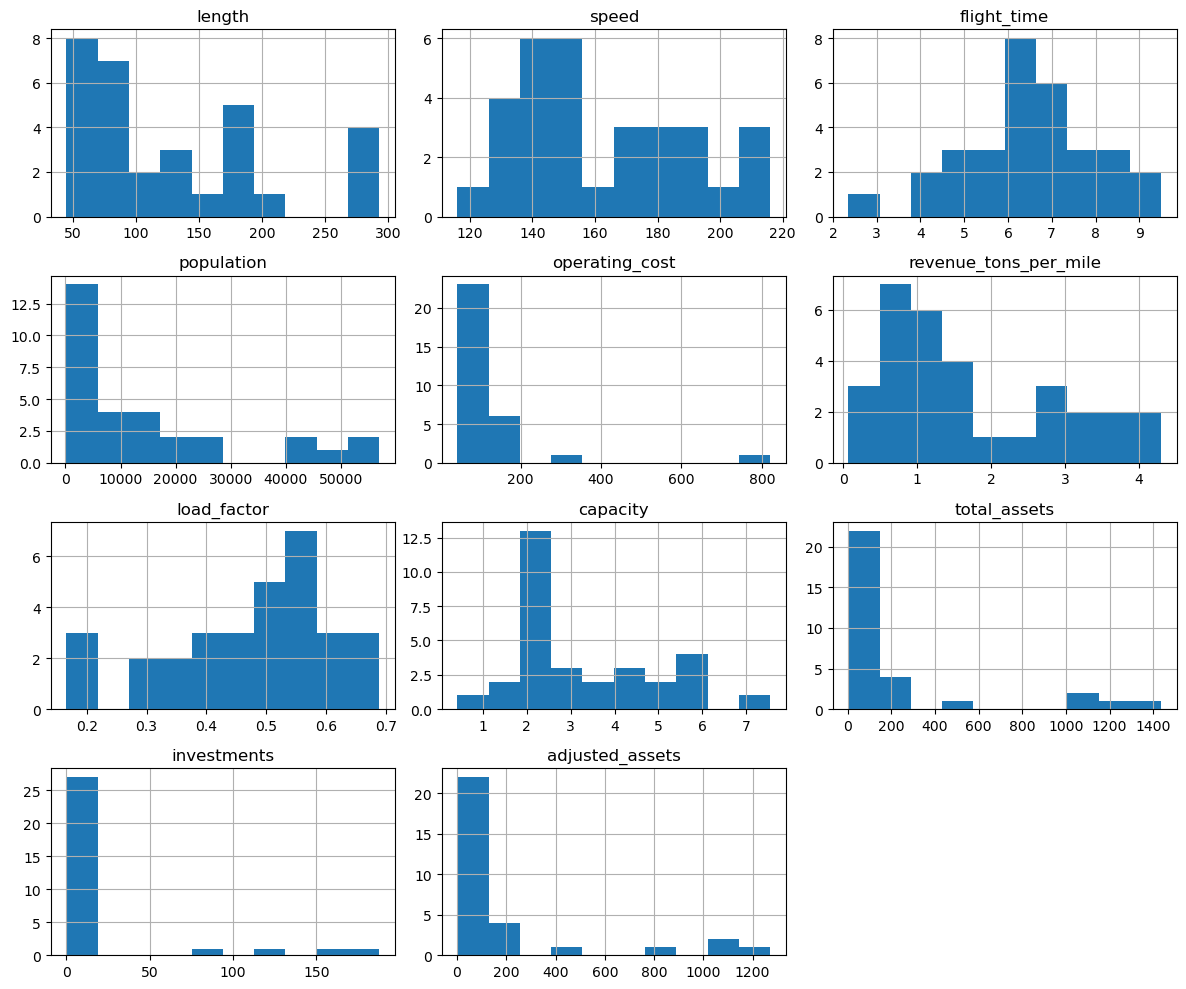

In [10]:


airline.select_dtypes(include=[np.number]).hist(figsize=(12,10), bins=10)

plt.tight_layout()
plt.show()

## Regresi Linier
1. Gunakan model regresi linier untuk memprediksi jumlah populasi yang dilayani (`population`) dari panjang rute penerbangan (`length`) dan durasi penerbangan (`flight_time`).
2. Selanjutnya, buatlah model regresi linier untuk memprediksi total assets (`total_assets`) dari jumlah populasi yang dilayani (`population`).
   
Apakah Anda mempunyai _insight_ mengenai dataset dari dua model regresi di atas?

In [11]:
# Function to calculate RMSE and MAE (from slides-03)
def get_mae(line,actual):
    error=[(x-y) for x,y in zip(line,actual)]
    errorabs=[abs(value) for value in error]
    mae=np.mean(errorabs)
    return mae

def get_rmse(line,actual):
    error=[(x-y) for x,y in zip(line,actual)]
    errorsquared=[(value)**2 for value in error]
    rmse=np.sqrt(np.mean(errorsquared))
    return rmse

### 1. Model regresi linier Prediksi jumlah populasi yang dilayani (population) dari panjang rute penerbangan (length) dan durasi penerbangan (flight_time).

In [12]:
passengers = airline.loc[:, ['population', 'length', 'flight_time']]
passengers.head()

,population,length,flight_time
0,20200,57,6.10
1,56928,270,6.93
2,183,100,4.45
3,11869,176,6.60
4,41097,142,7.47


In [13]:
passengers.describe()


,population,length,flight_time
count,31.000000,31.000000,31.000000
mean,14491.967742,129.096774,6.463226
std,16824.247836,73.212638,1.549586
min,183.000000,45.000000,2.350000
25%,2500.000000,71.000000,5.865000
50%,6500.000000,100.000000,6.600000
75%,19100.000000,174.500000,7.260000
max,56928.000000,293.000000,9.500000


In [14]:
passengers.corr()

,population,length,flight_time
population,1.000000,0.788239,0.361647
length,0.788239,1.000000,0.478035
flight_time,0.361647,0.478035,1.000000


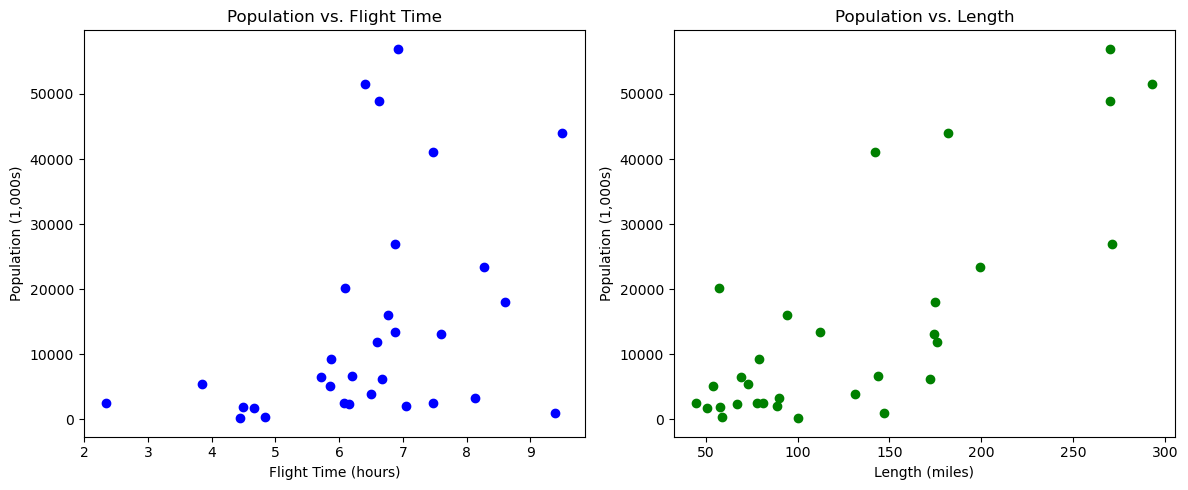

In [15]:
#Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot untuk flight_time vs. population
ax1.scatter(passengers['flight_time'], passengers['population'], color='blue')
ax1.set_title('Population vs. Flight Time')
ax1.set_xlabel('Flight Time (hours)')  # Asumsi satuan jam, sesuaikan jika berbeda
ax1.set_ylabel('Population (1,000s)')


# Scatter plot untuk length vs. population
ax2.scatter(passengers['length'], passengers['population'], color='green')
ax2.set_title('Population vs. Length')
ax2.set_xlabel('Length (miles)')  
ax2.set_ylabel('Population (1,000s)')
plt.tight_layout()
plt.show()


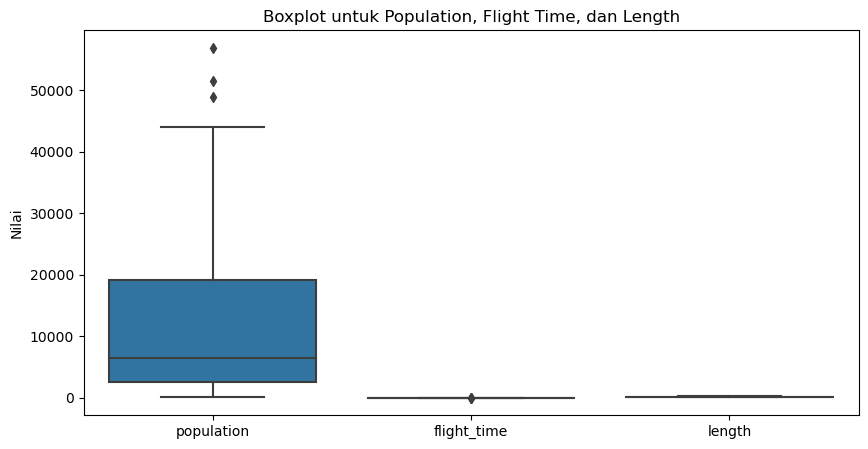

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=passengers[['population', 'flight_time', 'length']])
plt.title('Boxplot untuk Population, Flight Time, dan Length')
plt.ylabel('Nilai')
plt.show()

In [17]:
# Model 1 untuk prediksi population dengan 'length','flight+time'


x= passengers.loc[:,['length','flight_time']].values.reshape(-1,2)
y = passengers['population'].values.reshape(-1,1)

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
regressor_multi = LinearRegression()
regressor_multi.fit(x_train, y_train)

LinearRegression()

In [18]:
# koefisien dan intercept
print("Koefisien (flight_time, length):", regressor_multi.coef_)
print("Intercept (1,000s):", regressor_multi.intercept_)


Koefisien (flight_time, length): [[184.22482694 171.46674818]]
Intercept (1,000s): [-9685.43038941]


In [19]:
y_pred_train = regressor_multi.predict(x_train)
y_pred_test = regressor_multi.predict(x_test)

print("MAE Train :", get_mae(y_pred_train, y_train))
print("RMSE Train :", get_rmse(y_pred_train, y_train))
print("MAE Test :", get_mae(y_pred_test, y_test))
print("RMSE Test :", get_rmse(y_pred_test, y_test))

MAE Train : 8144.760431001691
RMSE Train : 10598.939566266223
MAE Test : 7811.298270356915
RMSE Test : 9062.87459158973


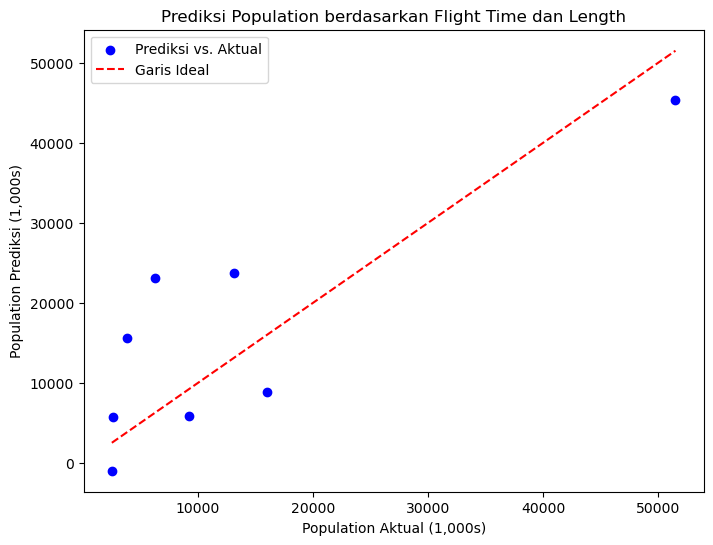

In [20]:
# Plot prediksi vs. aktual untuk data test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Prediksi vs. Aktual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Garis Ideal')
plt.title('Prediksi Population berdasarkan Flight Time dan Length')
plt.xlabel('Population Aktual (1,000s)')
plt.ylabel('Population Prediksi (1,000s)')
plt.legend()
plt.show()


In [21]:
# Model 2 dengan akar kuadrat dan akar pangkat tiga untuk memprediksi population dengan flight_time dan lenghtpassengers = passengers.copy
passengers = passengers.copy()  
passengers['sqrt_flight_time'] = passengers['flight_time'].apply(lambda x: math.sqrt(x) if x >= 0 else 0)
passengers['cbrt_flight_time'] = passengers['flight_time'].apply(lambda x: x**(1/3) if x >= 0 else 0)
passengers['sqrt_length'] = passengers['length'].apply(lambda x: math.sqrt(x) if x >= 0 else 0)
passengers['cbrt_length'] = passengers['length'].apply(lambda x: x**(1/3) if x >= 0 else 0)

In [22]:
X = passengers[['sqrt_flight_time', 'cbrt_flight_time', 'sqrt_length', 'cbrt_length']].values
y = passengers['population'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

regressor_akar = LinearRegression()
regressor_akar.fit(X_train, y_train)


LinearRegression()

In [23]:
#koefisien dan intercept

print("Koefisien (sqrt_flight_time, cbrt_flight_time, sqrt_length, cbrt_length):", regressor_akar.coef_)
print("Intersep (1,000s):", regressor_akar.intercept_)

Koefisien (sqrt_flight_time, cbrt_flight_time, sqrt_length, cbrt_length): [[ 9.56104260e+01  1.79512870e+04  4.85659240e+04 -1.51007053e+05]]
Intersep (1,000s): [188065.42508639]


In [24]:
# Prediksi dan evaluasi
y_pred_train = regressor_akar.predict(X_train)
y_pred_test = regressor_akar.predict(X_test)
print("MAE Train (1,000s):", get_mae(y_pred_train, y_train))
print("RMSE Train (1,000s):", get_rmse(y_pred_train, y_train))
print("MAE Test (1,000s):", get_mae(y_pred_test, y_test))
print("RMSE Test (1,000s):", get_rmse(y_pred_test, y_test))

MAE Train (1,000s): 7651.419003406391
RMSE Train (1,000s): 10064.808715133493
MAE Test (1,000s): 5969.486586856288
RMSE Test (1,000s): 7118.035872582117


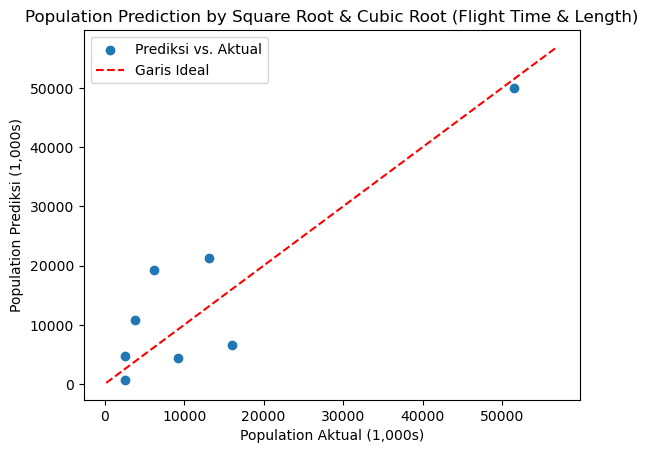

In [25]:
#plotting 
plt.scatter(y_test, y_pred_test, label='Prediksi vs. Aktual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Garis Ideal')
plt.title('Population Prediction by Square Root & Cubic Root (Flight Time & Length)')
plt.xlabel('Population Aktual (1,000s)')
plt.ylabel('Population Prediksi (1,000s)')
plt.legend()
plt.show()

- Dari kedua model untuk memprediksi population menggunakan length dan flight_time model yang terbaik adalah Regresi dengan akar pangkat 2 dan 3 karena rmse dan mae yang lebih kecil

### 2. Model regresi linier untuk memprediksi total assets (total_assets) dari jumlah populasi yang dilayani (population).

In [26]:
asset = airline.loc[:, ['population', 'total_assets']]
asset.head()

,population,total_assets
0,20200,21.13
1,56928,1436.53
2,183,6.65
3,11869,160.30
4,41097,195.02


In [27]:
asset.describe()

,population,total_assets
count,31.000000,31.000000
mean,14491.967742,215.310968
std,16824.247836,402.655569
min,183.000000,2.030000
25%,2500.000000,13.230000
50%,6500.000000,21.600000
75%,19100.000000,167.310000
max,56928.000000,1436.530000


In [28]:
asset.corr()

,population,total_assets
population,1.000000,0.904802
total_assets,0.904802,1.000000


Text(0, 0.5, 'Nilai (Population: 1,000s, Total Assets: $100,000)')

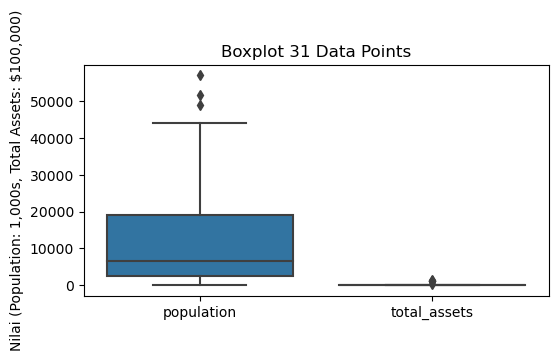

In [29]:
fig, ax = plt.subplots( figsize=(6, 3))

sns.boxplot(data=asset[['population', 'total_assets']], )
ax.set_title('Boxplot 31 Data Points')
ax.set_ylabel('Nilai (Population: 1,000s, Total Assets: $100,000)')

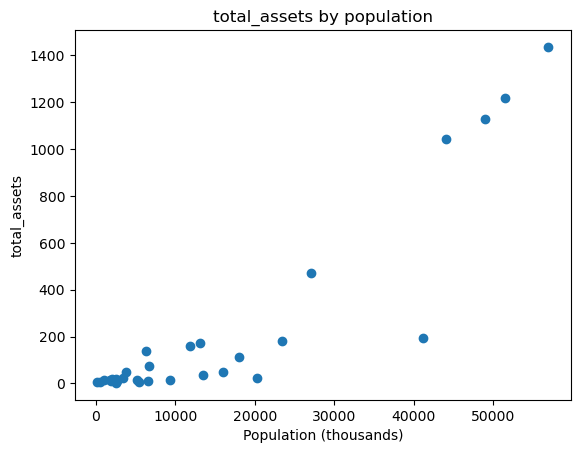

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [30]:
plt.scatter(asset['population'],asset['total_assets'])
plt.title('total_assets by population')
plt.xlabel('Population (thousands)')
plt.ylabel('total_assets')

plt.show()
plt.figure(figsize=(12, 5))

In [31]:
# Model 1 : Univariate regression (population -> total_assets)

x= asset.loc[:,['population']].values.reshape(-1,1)
y = asset['total_assets'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
regressor_asset = LinearRegression()
regressor_asset.fit(x_train, y_train)


LinearRegression()

In [32]:
print(regressor_asset.coef_)
print(regressor_asset.intercept_)

[[0.02092543]]
[-94.97358206]


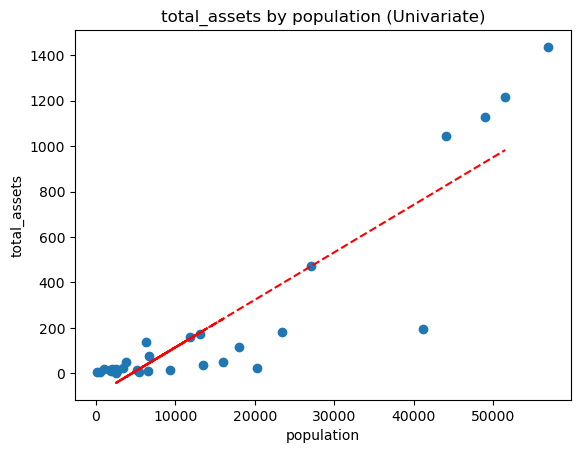

In [33]:
plt.scatter(asset['population'],asset['total_assets'], )
plt.plot(x_test,regressor_asset.predict(x_test),'r--', )
plt.title('total_assets by population (Univariate)')
plt.xlabel('population')
plt.ylabel('total_assets')
plt.show()

In [34]:
print(get_mae(regressor_asset.predict(x_train),y_train))
print(get_rmse(regressor_asset.predict(x_train),y_train))

print(get_mae(regressor_asset.predict(x_test),y_test))
print(get_rmse(regressor_asset.predict(x_test),y_test))

126.29412808561959
182.99000385106862
97.18831462063883
121.3870702325651


In [35]:
# Model 2: Polynomial Regression (population -> total_assets)

asset['quadratic'] = asset['population'].apply(lambda x: x**2)
asset['cubic'] = asset['population'].apply(lambda x: x**3)
asset['log']=asset['population'].apply(lambda x: math.log(x+1))

x2 = asset.loc[:, ['population', 'quadratic', 'cubic','log']].values.reshape(-1, 4)
y = asset['total_assets'].values.reshape(-1, 1)

x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.25, random_state=42)

regressor_cubic = LinearRegression()

regressor_cubic.fit(x2_train, y_train)


LinearRegression()

In [36]:
# koefisien (untuk population, quadratic, cubic) dan intersep

print("Koefisien:", regressor_cubic.coef_)
print("Intersep:", regressor_cubic.intercept_)

Koefisien: [[3.84363031e-03 1.29526751e-08 6.60307810e-12 1.06021575e+00]]
Intersep: [-1.03574392]


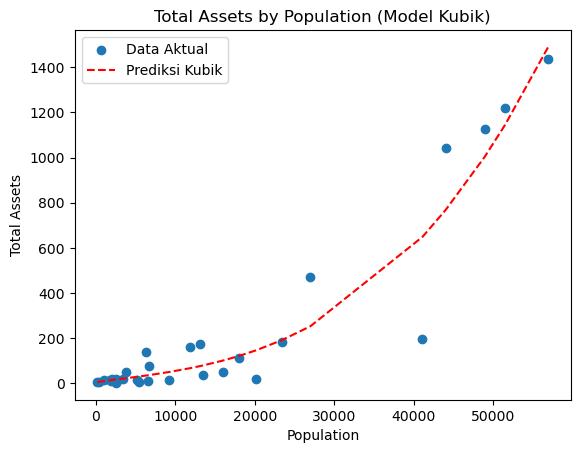

In [37]:
#plotting prediction anad actual 
plt.scatter(asset['population'], asset['total_assets'], label='Data Aktual')

population_sorted = np.sort(asset['population'].values.reshape(-1, 1), axis=0)
x2_sorted = np.hstack([population_sorted, population_sorted**2, population_sorted**3, np.log(population_sorted + 1)])
plt.plot(population_sorted, regressor_cubic.predict(x2_sorted), 'r--', label='Prediksi Kubik')

plt.title('Total Assets by Population (Model Kubik)')
plt.xlabel('Population')
plt.ylabel('Total Assets')
plt.legend()
plt.show()

In [38]:
# Prediksi dan evaluasi
y_pred_train = regressor_cubic.predict(x2_train)
y_pred_test = regressor_cubic.predict(x2_test)

print("MAE Train:", get_mae(y_pred_train, y_train))
print("RMSE Train:", get_rmse(y_pred_train, y_train))

print("MAE Test:", get_mae(y_pred_test, y_test))
print("RMSE Test:", get_rmse(y_pred_test, y_test))

MAE Train: 66.53370205473634
RMSE Train: 128.07586989198268
MAE Test: 51.23945999950375
RMSE Test: 61.733948865638155


- MAE Train (66.57) > MAE Test (51.26) dan RMSE Train (128.08) > RMSE Test (61.82) menunjukkan bahwa data latih mungkin memiliki outlier atau variansi lebih tinggi  berpotensi underfitting

- Maka mencoba outlier menggunakan metode IQR


In [39]:
# Model 3: polynominal regression (population -> total_assets) dengan pembersihan outliner
Q1 = asset['total_assets'].quantile(0.25)
Q3 = asset['total_assets'].quantile(0.75)
IQR = Q3 - Q1

In [40]:
asset_clean = asset[~((asset['total_assets'] < Q1 - 1.5 * IQR) | (asset['total_assets'] > Q3 + 1.5 * IQR))]
print("Jumlah data setelah outlier dihapus:", len(asset_clean))

Jumlah data setelah outlier dihapus: 26


In [41]:
asset_clean.describe()

,population,total_assets,quadratic,cubic,log
count,26.000000,26.000000,2.600000e+01,2.600000e+01,26.000000
mean,8496.538462,53.030769,1.558331e+08,4.189288e+12,8.444589
std,9326.717306,63.522597,3.439236e+08,1.365384e+13,1.252562
min,183.000000,2.030000,3.348900e+04,6.128487e+06,5.214936
25%,2377.750000,11.435000,5.658677e+06,1.347902e+10,7.773900
50%,5274.000000,18.385000,2.783224e+07,1.469682e+11,8.570425
75%,12806.500000,69.525000,1.642994e+08,2.111421e+12,9.456862
max,41097.000000,195.020000,1.688963e+09,6.941133e+13,10.623715


In [42]:
asset_clean = asset_clean.copy()
asset_clean['quadratic'] = asset_clean['population'].apply(lambda x: x**2)
asset_clean['cubic'] = asset_clean['population'].apply(lambda x: x**3)


x3 = asset_clean.loc[:, ['population', 'quadratic','cubic']].values
y = asset_clean['total_assets'].values.reshape(-1, 1)
scaler_x = StandardScaler()
x3_scaled = scaler_x.fit_transform(x3)
x3_train, x3_test, y_train, y_test = train_test_split(x3_scaled, y, test_size=0.25, random_state=42)
regressor_cubic_scaled = LinearRegression()
regressor_cubic_scaled.fit(x3_train, y_train)

LinearRegression()

In [43]:
# koefisien (untuk population, quadratic, cubic) dan intersep
print("Koefisien :", regressor_cubic_scaled.coef_)
print("Intersep ", regressor_cubic_scaled.intercept_)


Koefisien : [[ 75.83823093 -39.24509845   9.61500832]]
Intersep  [59.06999393]


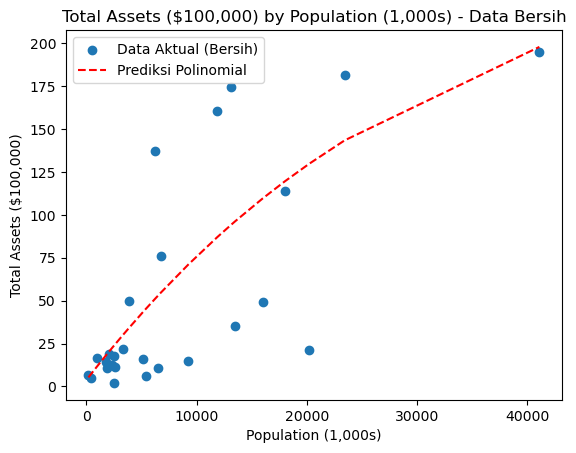

In [44]:
population_sorted = np.sort(asset_clean['population'].values.reshape(-1, 1), axis=0)
x3_sorted = np.hstack([population_sorted, population_sorted**2, population_sorted**3])
x3_sorted_scaled = scaler_x.transform(x3_sorted)

plt.scatter(asset_clean['population'], asset_clean['total_assets'], label='Data Aktual (Bersih)')
plt.plot(population_sorted, regressor_cubic_scaled.predict(x3_sorted_scaled), 'r--', label='Prediksi Polinomial')
plt.title('Total Assets ($100,000) by Population (1,000s) - Data Bersih')
plt.xlabel('Population (1,000s)')
plt.ylabel('Total Assets ($100,000)')
plt.legend()
plt.show()

In [45]:
# Prediksi dan evaluasi

y_pred_train = regressor_cubic_scaled.predict(x3_train)
y_pred_test = regressor_cubic_scaled.predict(x3_test)

print("MAE Train:", get_mae(y_pred_train, y_train))
print("RMSE Train:", get_rmse(y_pred_train, y_train))

print("MAE Test:", get_mae(y_pred_test, y_test))
print("RMSE Test:", get_rmse(y_pred_test, y_test))

MAE Train: 25.37444354346689
RMSE Train: 36.47108749737201
MAE Test: 45.34569750865631
RMSE Test: 57.91899056367892


- Dari ketiga model untuk memprediksi assets by population,model terbaik adalah Regresi  pangkat 2 dan 3 dengan pembersihan outliner karena rmse dan mae yang lebih kecil

<center><h1>The End</h1></center>
